In [11]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import geoplot
import re

In [12]:
# Downloaded the s3 files (Or boto3 can be used to access the clusters formed)
part0=open("/Users/vseel2/Downloads/part-00000","r")
part1=open("/Users/vseel2/Downloads/part-00001","r")
part2=open("/Users/vseel2/Downloads/part-00002 (1)","r")
part3=open("/Users/vseel2/Downloads/part-00003","r")

In [13]:
# Reading the cluster files
p0=part0.read()
p1=part1.read()
p2=part2.read()
p3=part3.read()

In [14]:
# Extracting the fields 
p0_list=p0.split("\n")
consolidated_list_p0=[]
for row_indx in range(0,len(p0_list)-1):
    centroid=p0_list[row_indx][21]
    intermediate=p0_list[row_indx].split("[")
    lats=intermediate[1][0:-13]
    longs=intermediate[2][0:-2]
    consolidated_list_p0.append([centroid,lats,longs])
    
c0_lats=consolidated_list_p0[0][1].split(",")
c0_longs=consolidated_list_p0[0][2].split(",")
c0_lats=[lat.strip(" ") for lat in c0_lats]
c0_lats=[lat.strip("'") for lat in c0_lats]
c0_lats=[float(lat) for lat in c0_lats]
c0_longs=[lat.strip(" ") for lat in c0_longs]
c0_longs=[lat.strip("'") for lat in c0_longs]
c0_longs=[float(lat) for lat in c0_longs]

In [15]:
# Extracting longitude and latitudes for 5 clusters of the used cars data
p1_list=p1.split("\n")
consolidated_list_p1=[]
for row_indx in range(0,len(p1_list)-1):
    centroid=p1_list[row_indx][21]
    intermediate=p1_list[row_indx].split("[")
    lats=intermediate[1][0:-13]
    longs=intermediate[2][0:-2]
    consolidated_list_p1.append([centroid,lats,longs])


c1_lats=consolidated_list_p1[0][1].split(",")
c1_longs=consolidated_list_p1[0][2].split(",")
c1_lats=[lat.strip(" ") for lat in c1_lats]
c1_lats=[lat.strip("'") for lat in c1_lats]
c1_lats=[float(lat) for lat in c1_lats]
c1_longs=[lat.strip(" ") for lat in c1_longs]
c1_longs=[lat.strip("'") for lat in c1_longs]
c1_longs=[float(lat) for lat in c1_longs]

c2_lats=consolidated_list_p1[1][1].split(",")
c2_longs=consolidated_list_p1[1][2].split(",")
c2_lats=[lat.strip(" ") for lat in c2_lats]
c2_lats=[lat.strip("'") for lat in c2_lats]
c2_lats=[float(lat) for lat in c2_lats]
c2_longs=[lat.strip(" ") for lat in c2_longs]
c2_longs=[lat.strip("'") for lat in c2_longs]
c2_longs=[float(lat) for lat in c2_longs]


consolidated_list_p2=[]
centroid=p2[21]
intermediate=p2.split("[")
lats=intermediate[1][0:-13]
longs=intermediate[2][0:-3]
consolidated_list_p2.append([centroid,lats,longs])


c3_lats=consolidated_list_p2[0][1].split(",")
c3_longs=consolidated_list_p2[0][2].split(",")
c3_lats=[lat.strip(" ") for lat in c3_lats]
c3_lats=[lat.strip("'") for lat in c3_lats]
c3_lats=[float(lat) for lat in c3_lats]
c3_longs=[lat.strip(" ") for lat in c3_longs]
c3_longs=[lat.strip("'") for lat in c3_longs]
c3_longs=[float(lat) for lat in c3_longs]

p3_list=p3.split("\n")
consolidated_list_p3=[]
for row_indx in range(0,len(p3_list)-1):
    centroid=p3_list[row_indx][21]
    intermediate=p3_list[row_indx].split("[")
    lats=intermediate[1][0:-13]
    longs=intermediate[2][0:-2]
    consolidated_list_p3.append([centroid,lats,longs])

c4_lats=consolidated_list_p3[0][1].split(",")
c4_longs=consolidated_list_p3[0][2].split(",")
c4_lats=[lat.strip(" ") for lat in c4_lats]
c4_lats=[lat.strip("'") for lat in c4_lats]
c4_lats=[float(lat) for lat in c4_lats]
c4_longs=[lat.strip(" ") for lat in c4_longs]
c4_longs=[lat.strip("'") for lat in c4_longs]
c4_longs=[float(lat) for lat in c4_longs]

c5_lats=consolidated_list_p3[1][1].split(",")
c5_longs=consolidated_list_p3[1][2].split(",")
c5_lats=[lat.strip(" ") for lat in c5_lats]
c5_lats=[lat.strip("'") for lat in c5_lats]
c5_lats=[float(lat) for lat in c5_lats]
c5_longs=[lat.strip(" ") for lat in c5_longs]
c5_longs=[lat.strip("'") for lat in c5_longs]
c5_longs=[float(lat) for lat in c5_longs]


In [16]:
# creating a dataframe for visualization
c0_df = pd.DataFrame(list(zip(c0_lats,c0_longs)), columns =['latitude', 'longitude'])
c1_df = pd.DataFrame(list(zip(c1_lats,c1_longs)), columns =['latitude', 'longitude'])
c2_df = pd.DataFrame(list(zip(c2_lats,c2_longs)), columns =['latitude', 'longitude'])
c3_df = pd.DataFrame(list(zip(c3_lats,c3_longs)), columns =['latitude', 'longitude'])
c4_df = pd.DataFrame(list(zip(c4_lats,c4_longs)), columns =['latitude', 'longitude'])
c5_df = pd.DataFrame(list(zip(c5_lats,c5_longs)), columns =['latitude', 'longitude'])

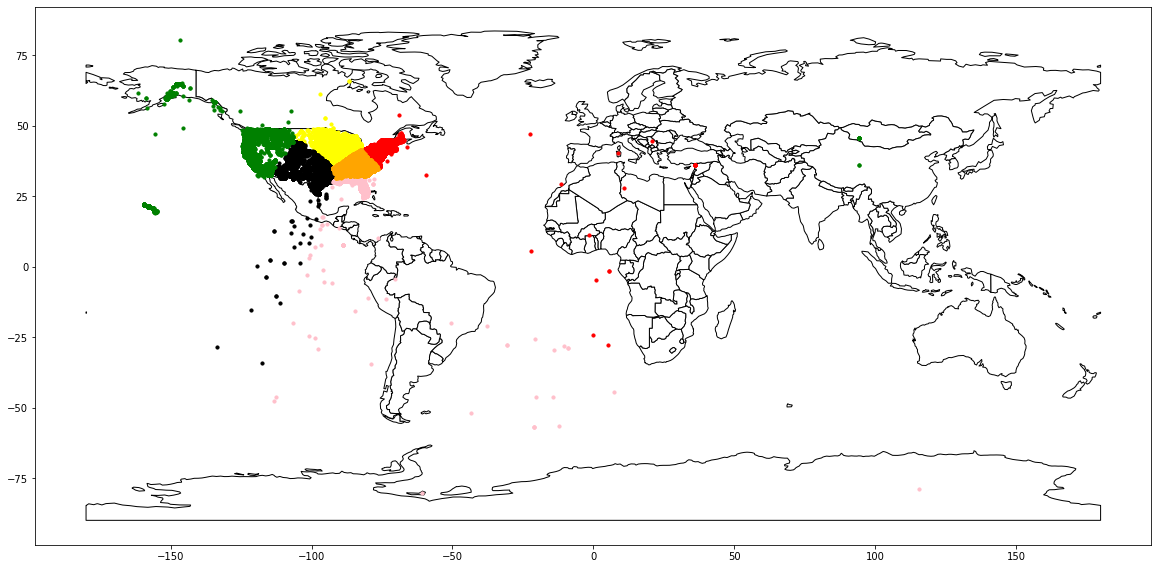

In [17]:
#plotting 5 clusters
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=world.plot(color='white', edgecolor='black',figsize=(20, 10))

geometry0=[Point(xy) for xy in zip(c0_df['longitude'], c0_df['latitude'])]
gdf0=GeoDataFrame(c0_df, geometry=geometry0)  
gdf0.plot(ax=ax, marker='o', color='red', markersize=10);

geometry1=[Point(xy) for xy in zip(c1_df['longitude'], c1_df['latitude'])]
gdf1=GeoDataFrame(c1_df, geometry=geometry1)  
gdf1.plot(ax=ax, marker='o', color='yellow', markersize=10);

geometry2=[Point(xy) for xy in zip(c2_df['longitude'], c2_df['latitude'])]
gdf2=GeoDataFrame(c2_df, geometry=geometry2)  
gdf2.plot(ax=ax, marker='o', color='black', markersize=10);

geometry3=[Point(xy) for xy in zip(c3_df['longitude'], c3_df['latitude'])]
gdf3=GeoDataFrame(c3_df, geometry=geometry3)  
gdf3.plot(ax=ax, marker='o', color='pink', markersize=10);

geometry4=[Point(xy) for xy in zip(c4_df['longitude'], c4_df['latitude'])]
gdf4=GeoDataFrame(c4_df, geometry=geometry4)  
gdf4.plot(ax=ax, marker='o', color='orange', markersize=10);

geometry5=[Point(xy) for xy in zip(c5_df['longitude'], c5_df['latitude'])]
gdf5=GeoDataFrame(c5_df, geometry=geometry5)  
gdf5.plot(ax=ax, marker='o', color='green', markersize=10);
    